# **Práctica 3: Brillo y contraste**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

# Histograma

Para analizar el brillo y el contraste de una imagen es importante entender el histograma de intensidades. Para ello se va a comenzar la práctica realizando una función para visualizar una imagen junto a su histograma.


> Implementa una función que dada una imagen realice una visualización conjunta tanto de la imagen como de su histograma y distribución acumulada siguiendo las indicaciones que se muestran a continuación:
>
> Se debe verificar que la imagen es de tipo uint8. El histograma tendrá 256 bins, desde 0 a 255
>
> La función debe permitir el uso de imágenes en color o de imágenes en escala de grises
>
> Para calcular el histograma se debe implementar una función propia
>

A continuación se muestra algo de ayuda.



In [4]:
# Importar bibliotecas que pueden ser necesarias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import skimage 

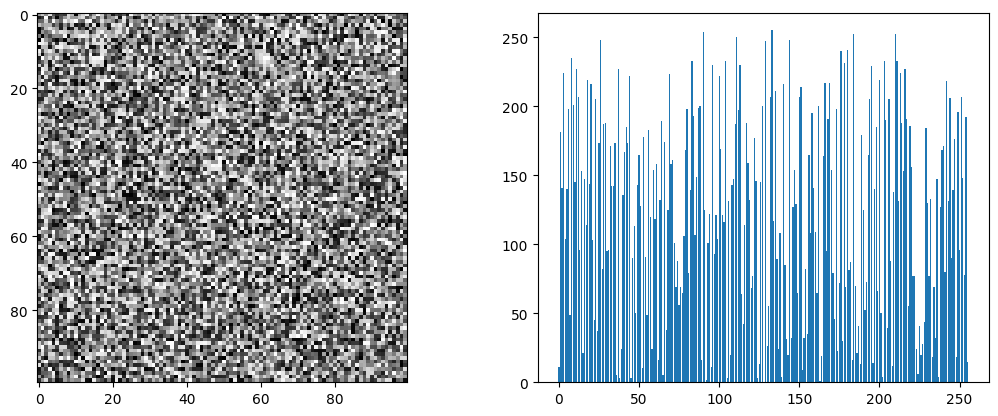

In [5]:
# Creación de la figura
width, height = plt.rcParams['figure.figsize']
fig, (ax_img, ax_hist) = plt.subplots(1, 2, figsize=(2*width, height))

# La primera se usará para la imagen, la segunda para el histograma

# Ejemplo de visualización de la imagen
img = np.random.randint(0, 256, size=(100, 100), dtype=np.uint8)
ax_img.imshow(img, cmap='gray')

# Ejemplo de visualización del histograma
hist = np.random.randint(0, 256, size=(256,), dtype=np.uint8)
ax_hist.bar(np.arange(256), hist)
plt.show()

In [ ]:
def iter_channels(color_image):
    for channel in np.rollaxis(color_image, -1):
        yield channel

# Función para visualizar el histograma de una imagen
# Esta función está sin terminar
def plot_histogram(img):
    if img.ndim == 2:
        # imagen en escala de grises
        pass
    elif img.ndim == 3:
        # imagen en color
        # `channel` es el canal rojo, verde o azul de la imagen.
        for channel, channel_color in zip(iter_channels(img), 'rgb'):
            # crear histograma de cada canal
            pass

## Ajuste de contraste lineal

Una vez que se tiene la visualización del histograma se puede analizar mejor el brillo y el contraste. También es más fácil entender cómo funcionan los métodos de ajuste de contraste.

> Crea una función que realice un ajuste de intensidad afín usando la ecuación $s = ra+b$, donde $s$ es el valor del píxel de salida, $r$ el de entrada y $a$ y $b$ son dos constantes. La función debe evitar que el resultado se salga del rango de representación (`np.clip`). Para ello se recomienda realizar una conversión a flotante para realizar las operaciones (`img.astype(np.double)`). Después de la operación se debe volver a convertir a su formato original.

> Prueba con diversos valores de $a$ y $b$ y analiza el resultado.


> Realiza la normalización de la imagen usando $r_{norm} =  \frac{r - r_{min}} {r_{max} - r_{min}}$, donde $r_{min}$ es el valor de intensidad mínimo de la imagen, y  $r_{max}$ es el máximo. Este tipo de normalización (min-max normalization) debe retornar una imagen en el rango [0, 1]. En el caso de imagen de color, realiza este proceso para cada canal.

> Convierte la imagen normalizada al rango [0, 255] (se consigue simplemente multiplicando por 255).

> Repite el proceso usando el percentil 2 y 98 como valores de $r_{min}$ y $r_{max}$.

> Usa las técnicas anteriores para visualizar la imagen `http://www.atc.uniovi.es/grado/3va/prac/convection.png`




# Ajuste de contraste no lineal

También es posible realizar ajuste con transformaciones no lineales. Una de las posibilidades es el ajuste de sigmoide, $s = \frac{1}{1 + e^{(\mathrm{cutoff} - r)\mathrm{gain}}}$ donde $s$ es el valor de píxel transformado, $r$ es la intensidad de entrada y $\mathrm{cutoff}$ y $\mathrm{gain}$ son parámetros. Esta ecuación asume que los valores de entrada están normalizados en el intervalo [0, 1].

> Realiza la representación de la función de transformación para $\mathrm{cutoff} = 0.5$ y $\mathrm{gain} = 12$.



Ahora realiza esta mejora de contraste en la imagen `http://www.atc.uniovi.es/grado/3va/prac/persona.png`.
